In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/doordash_delivery/
!ls

Mounted at /content/drive
/content/drive/MyDrive/doordash_delivery
historical_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('historical_data.csv')
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [ ]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [ ]:
df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.select_dtypes('object').nunique()

,0
created_at,180985
actual_delivery_time,178110
store_primary_category,74


In [4]:
time_column = ['created_at', 'actual_delivery_time']
df[time_column] = df[time_column].apply(pd.to_datetime)

df["is_weekend"] = df["created_at"].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
df["actual_total_delivery_duration"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()
df['estimated_non_prep_duration'] = df["estimated_store_to_consumer_driving_duration"] + df["estimated_order_place_duration"]

df = df.drop(columns=time_column, axis =1)


In [5]:
# Create a dictionary that maps each store_id to its mode store_primary_category
store_id_unique = df["store_id"].unique().tolist()
store_id_and_category = {store_id: df[df.store_id == store_id].store_primary_category.mode()
                         for store_id in store_id_unique}

# Function to fill NaN values based on the store_id's mode of store_primary_category
def fill(store_id):
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan

# Use fillna to update the store_primary_category column in place
df["store_primary_category"] = df["store_primary_category"].fillna(
    df["store_id"].apply(fill))


In [ ]:
df

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,is_weekend,actual_total_delivery_duration,estimated_non_prep_duration
0,1.0,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0,3779.0,1307.0
1,2.0,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0,4024.0,1136.0
2,3.0,5477,indian,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0,1781.0,1136.0
3,3.0,5477,indian,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0,3075.0,735.0
4,3.0,5477,indian,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,1,2390.0,1096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,0,3907.0,582.0
197424,1.0,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,0,3383.0,1166.0
197425,1.0,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,1,3008.0,1046.0
197426,1.0,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,1,3907.0,830.0


In [6]:
# Calculate the ratio of busy dashers to total on-shift dashers.
df["busy_dashers_ratio"] = df["total_busy_dashers"] / df["total_onshift_dashers"]

# Calculate the preparation duration by subtracting the estimated non-preparation duration from the actual total delivery duration.
df["prep_duration"] = df["actual_total_delivery_duration"] - df["estimated_non_prep_duration"]

# Calculate the average item price by dividing the subtotal by the total number of items.
df["avg_item_price"] = df["subtotal"] / df["total_items"]

# Calculate the order complexity by multiplying the total number of items by the number of distinct items.
df["order_complexity"] = df["total_items"] * df["num_distinct_items"]

# Calculate the ratio of on-shift dashers to outstanding orders.
df["dashers_to_orders_ratio"] = df["total_onshift_dashers"] / df["total_outstanding_orders"]

# Calculate the difference between the actual total delivery duration and the estimated non-preparation duration.
df["delivery_time_difference"] = df["actual_total_delivery_duration"] - df["estimated_non_prep_duration"]


In [ ]:
df

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,estimated_store_to_consumer_driving_duration,is_weekend,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio,prep_duration,avg_item_price,order_complexity,dashers_to_orders_ratio,delivery_time_difference
0,1.0,1845,american,1.0,4,3441,4,557,1239,33.0,...,861.0,0,3779.0,1307.0,0.424242,2472.0,860.250000,16,1.571429,2472.0
1,2.0,5477,mexican,2.0,1,1900,1,1400,1400,1.0,...,690.0,0,4024.0,1136.0,2.000000,2888.0,1900.000000,1,0.500000,2888.0
2,3.0,5477,indian,1.0,1,1900,1,1900,1900,1.0,...,690.0,0,1781.0,1136.0,0.000000,645.0,1900.000000,1,inf,645.0
3,3.0,5477,indian,1.0,6,6900,5,600,1800,1.0,...,289.0,0,3075.0,735.0,1.000000,2340.0,1150.000000,30,0.500000,2340.0
4,3.0,5477,indian,1.0,3,3900,3,1100,1600,6.0,...,650.0,1,2390.0,1096.0,1.000000,1294.0,1300.000000,9,0.666667,1294.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2956,fast,4.0,3,1389,3,345,649,17.0,...,331.0,0,3907.0,582.0,1.000000,3325.0,463.000000,9,0.739130,3325.0
197424,1.0,2956,fast,4.0,6,3010,4,405,825,12.0,...,915.0,0,3383.0,1166.0,0.916667,2217.0,501.666667,24,0.857143,2217.0
197425,1.0,2956,fast,4.0,5,1836,3,300,399,39.0,...,795.0,1,3008.0,1046.0,1.051282,1962.0,367.200000,15,0.975000,1962.0
197426,1.0,3630,sandwich,1.0,1,1175,1,535,535,7.0,...,384.0,1,3907.0,830.0,1.000000,3077.0,1175.000000,1,0.583333,3077.0


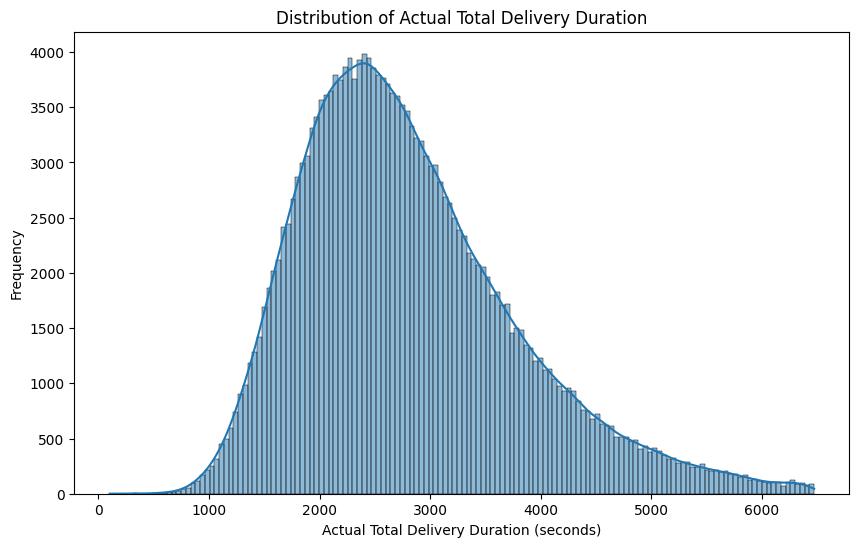

In [ ]:
# Filter out extreme outliers for better visualization
df_filtered = df[df['actual_total_delivery_duration'] <= df['actual_total_delivery_duration'].quantile(0.99)]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['actual_total_delivery_duration'], kde=True)
plt.title('Distribution of Actual Total Delivery Duration')
plt.xlabel('Actual Total Delivery Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


In [7]:
# get dummies order protocol & market id and store primary
dummies_columns = ["market_id", "order_protocol", "store_primary_category"]

df_encoded = pd.get_dummies(df, columns=dummies_columns, drop_first=True)
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True) # Correct syntax for negative infinity
df_encoded = df_encoded.dropna()
df_encoded = df_encoded.astype(float)
df_encoded


,store_id,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,...,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,1845.0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5477.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5477.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5477.0,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5477.0,3.0,5000.0,3.0,1500.0,1900.0,2.0,2.0,2.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2956.0,3.0,1389.0,3.0,345.0,649.0,17.0,17.0,23.0,251.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197424,2956.0,6.0,3010.0,4.0,405.0,825.0,12.0,11.0,14.0,251.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197425,2956.0,5.0,1836.0,3.0,300.0,399.0,39.0,41.0,40.0,251.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197426,3630.0,1.0,1175.0,1.0,535.0,535.0,7.0,7.0,12.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


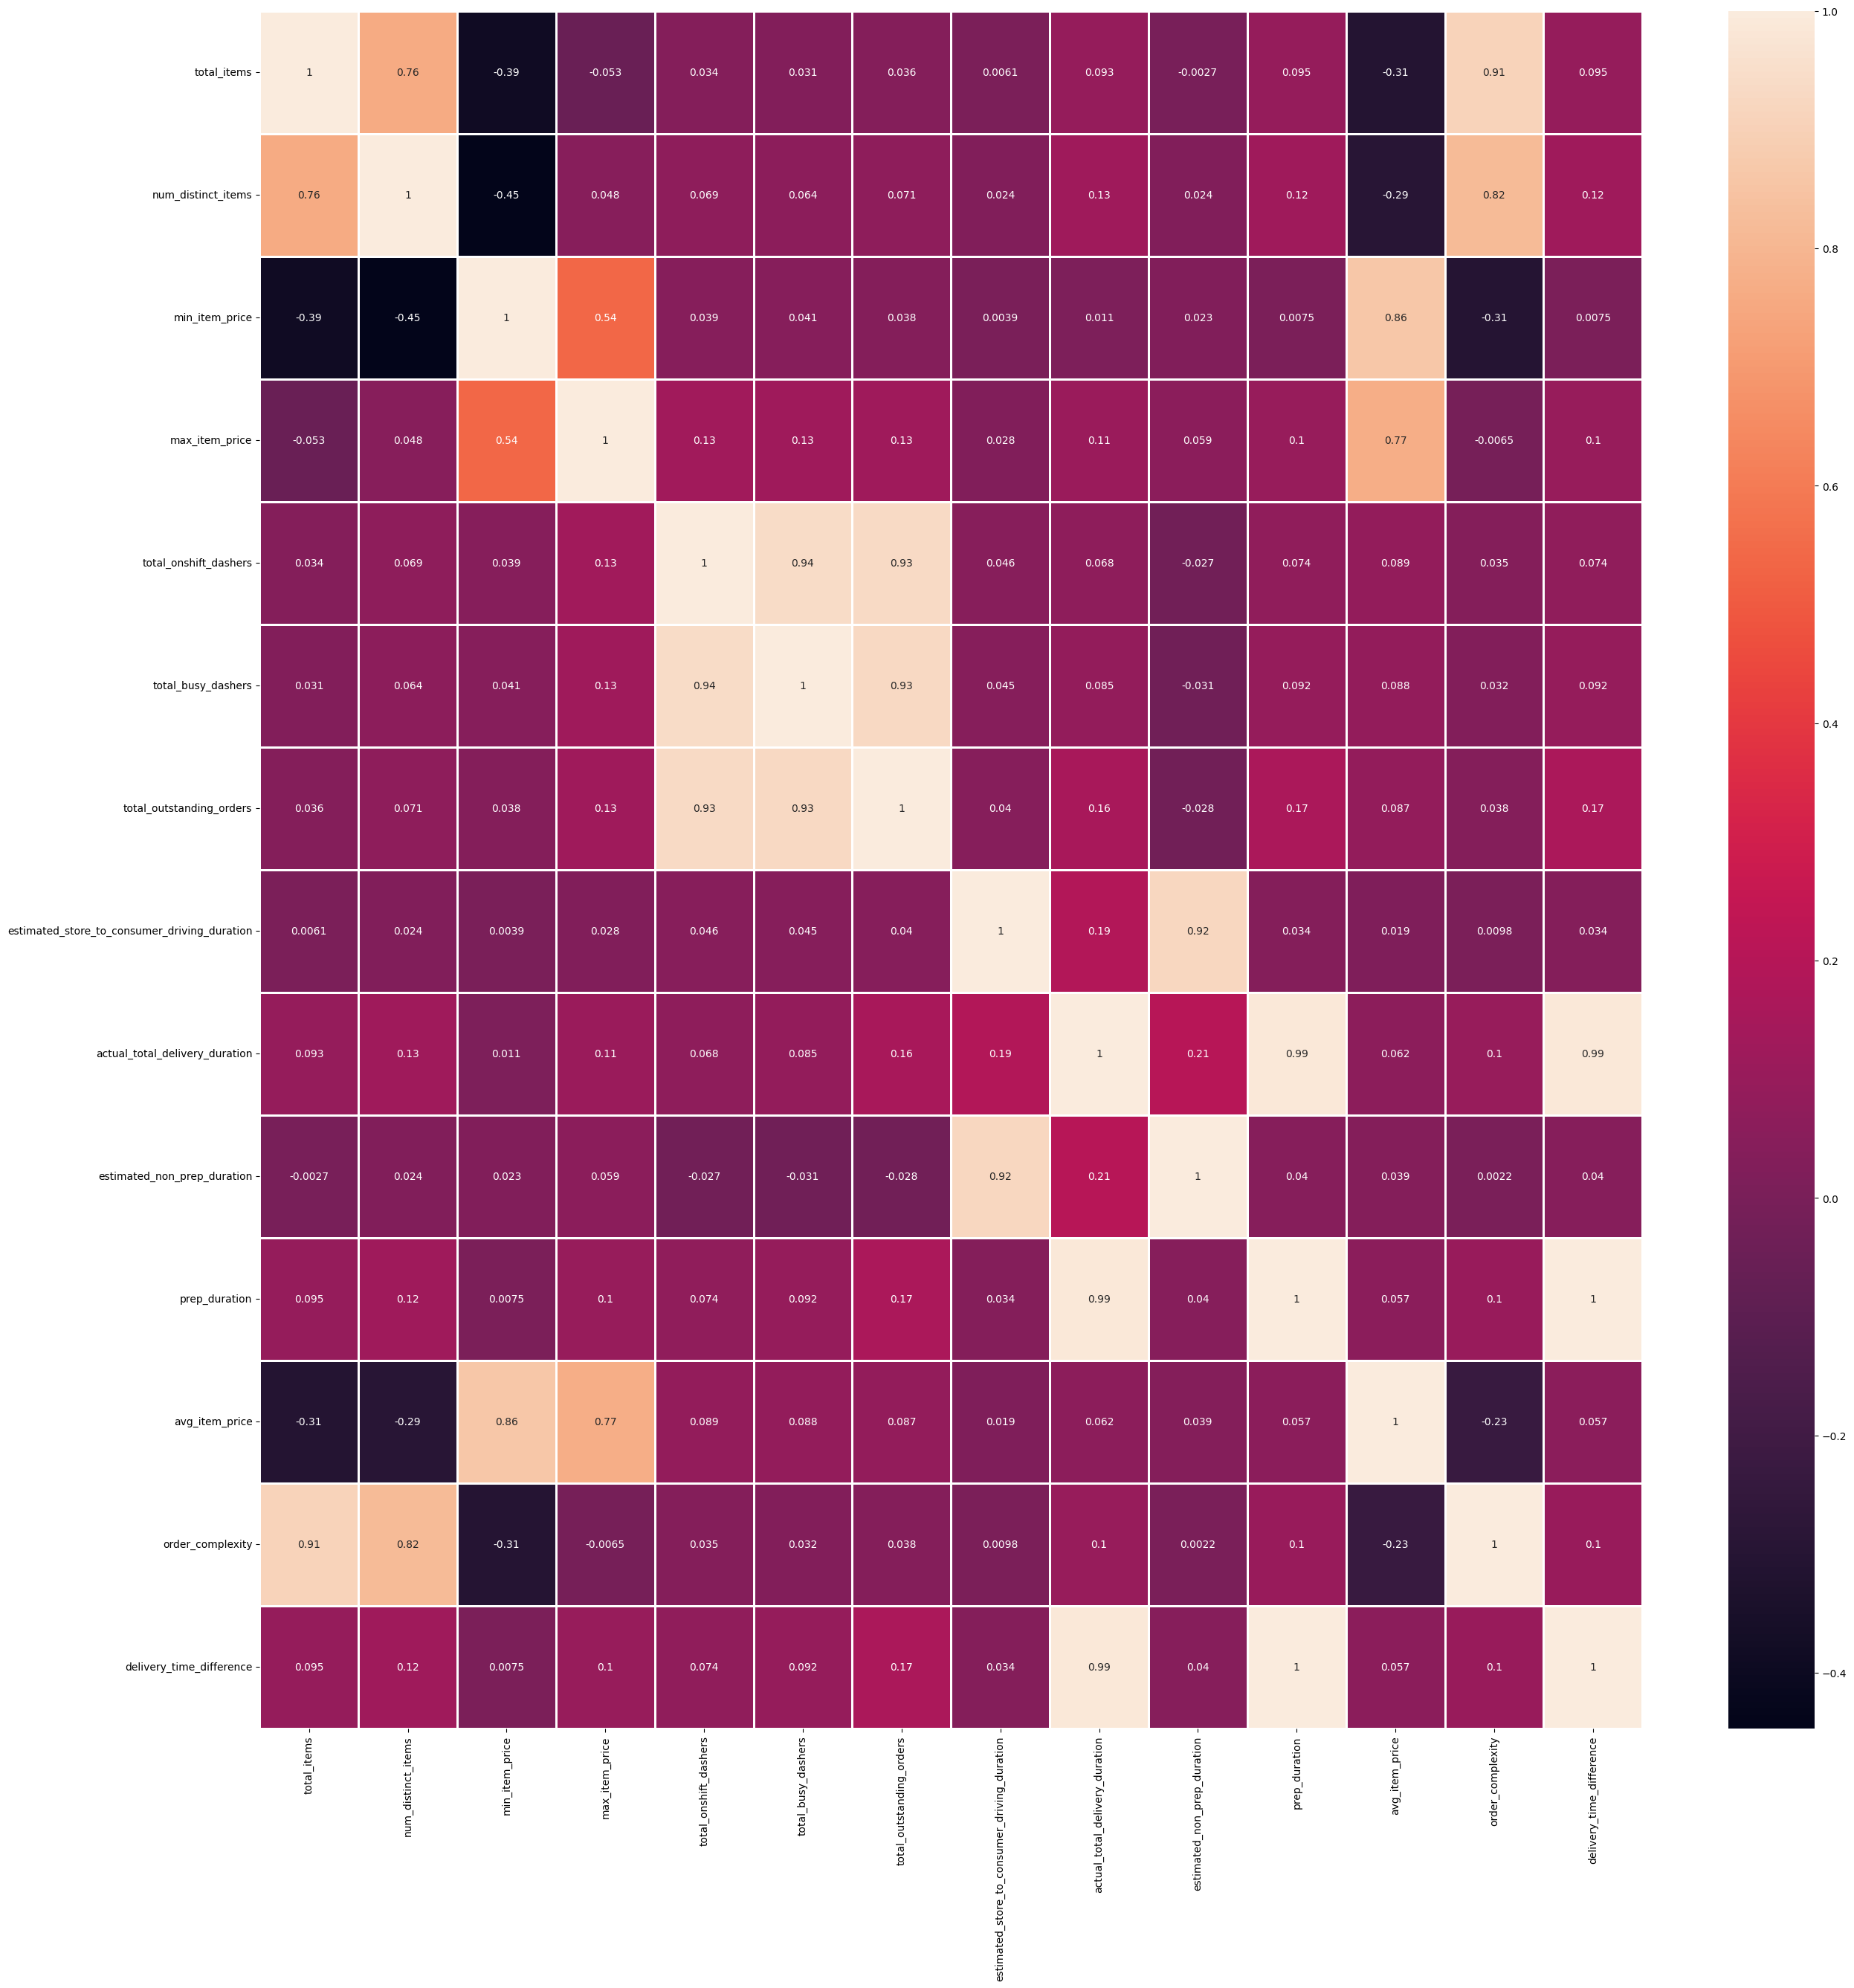

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Filter for correlations greater than 0.7
high_corr = corr_matrix[abs(corr_matrix) > 0.7]

# Remove diagonal part
high_corr = high_corr.mask(np.equal(*np.indices(high_corr.shape)))

# Get columns with at least one high correlation
cols_to_keep = high_corr.columns[high_corr.notna().any()]

# Display the heatmap with only highly correlated columns
plt.figure(figsize=(30, 30))
sns.heatmap(df_encoded[cols_to_keep].corr(), annot=True, lw=1)
plt.show()


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF in parallel
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Function to update VIF values after dropping a feature
def update_vif(df, dropped_feature=None):
    if dropped_feature is not None:
        df = df.drop(columns=[dropped_feature])
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return df, vif_data

# Optional: Drop highly correlated features to reduce computation time upfront
def drop_highly_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return df.drop(columns=to_drop)

# Start the VIF reduction process
target_column = df_encoded[['actual_total_delivery_duration']].copy()
df_vif = df_encoded.drop(columns=['actual_total_delivery_duration'])

# Drop features that are highly correlated beforehand
df_vif = drop_highly_correlated_features(df_vif, threshold=0.9)

vif_threshold = 5

# Calculate initial VIF values
vif_data = calculate_vif(df_vif)
print("Initial VIF values:\n", vif_data)

# Iteratively drop features with high VIF
while vif_data['VIF'].max() > vif_threshold:
    max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
    print(f'Removing feature {max_vif_feature} with VIF = {vif_data["VIF"].max()}')

    # Drop the feature with the highest VIF
    df_vif, vif_data = update_vif(df_vif, max_vif_feature)
    print(vif_data)

# Combine the remaining features with the target column
df_encoded_final = pd.concat([df_vif, target_column], axis=1)
print("Final DataFrame after VIF reduction:\n", df_encoded_final.head())


Initial VIF values:
                               feature        VIF
0                            store_id   4.113831
1                         total_items   6.760054
2                            subtotal  13.826235
3                  num_distinct_items  16.111208
4                      min_item_price  14.157973
..                                ...        ...
93        store_primary_category_thai   4.492520
94     store_primary_category_turkish   1.125339
95       store_primary_category_vegan   1.124274
96  store_primary_category_vegetarian   1.421142
97  store_primary_category_vietnamese   4.084782

[98 rows x 2 columns]
Removing feature estimated_order_place_duration with VIF = 47.84187928218564
                              feature        VIF
0                            store_id   4.095008
1                         total_items   6.759074
2                            subtotal  13.781573
3                  num_distinct_items  15.987463
4                      min_item_price  14.1555

In [ ]:
df_encoded_final

,store_id,total_items,min_item_price,total_onshift_dashers,is_weekend,prep_duration,dashers_to_orders_ratio,market_id_2.0,market_id_3.0,market_id_4.0,...,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,actual_total_delivery_duration
0,1845.0,4.0,557.0,33.0,0.0,2472.0,1.571429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3779.0
1,5477.0,1.0,1400.0,1.0,0.0,2888.0,0.500000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4024.0
3,5477.0,6.0,600.0,1.0,0.0,2340.0,0.500000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3075.0
4,5477.0,3.0,1100.0,6.0,1.0,1294.0,0.666667,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2390.0
5,5477.0,3.0,1500.0,2.0,0.0,1516.0,1.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2956.0,3.0,345.0,17.0,0.0,3325.0,0.739130,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3907.0
197424,2956.0,6.0,405.0,12.0,0.0,2217.0,0.857143,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3383.0
197425,2956.0,5.0,300.0,39.0,1.0,1962.0,0.975000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3008.0
197426,3630.0,1.0,535.0,7.0,1.0,3077.0,0.583333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3907.0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [13]:
X = df_encoded_final.drop(['actual_total_delivery_duration','store_id'], axis=1)
y = df_encoded_final['actual_total_delivery_duration']

scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


In [14]:
def models(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

    model_dict = {
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'ExtraTreeRegressor': ExtraTreeRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'GradientBoostingRegressor': GradientBoostingRegressor(),
        'XGBRegressor': XGBRegressor(),
        'LGBMRegressor': LGBMRegressor() }

    results = {}

    for name, model in model_dict.items():

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f'{name} - MSE: {mse:.4f}, R2: {r2:.4f}')

        results[name] = {'MSE': mse, 'R2': r2}

    return results

results = models(X, y)


Ridge - MSE: 0.0250, R2: 0.9622
Lasso - MSE: 0.0283, R2: 0.9572
DecisionTreeRegressor - MSE: 0.0508, R2: 0.9232
ExtraTreeRegressor - MSE: 0.0500, R2: 0.9244
RandomForestRegressor - MSE: 0.0270, R2: 0.9592
GradientBoostingRegressor - MSE: 0.0255, R2: 0.9614
XGBRegressor - MSE: 0.0620, R2: 0.9062
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 141107, number of used features: 77
[LightGBM] [Info] Start training from score -0.000810
LGBMRegressor - MSE: 0.0917, R2: 0.8614


In [ ]:
#there is an overfitting since there is high correlation, because ensemble learning only take 77 features
# therefore feature selection step is needed


In [17]:
import statsmodels.api as sm

def bidirectional_feature_selection(x, y, significance_threshold=0.05):
    selected_features = set(x.columns)  # Starts with all features

    while True:
        # Convert selected_features to a list before indexing
        model = sm.OLS(y, sm.add_constant(x[list(selected_features)])).fit()
        p_values = model.pvalues.iloc[1:]
        significant_features = p_values[p_values < significance_threshold].index

        if len(significant_features) == len(selected_features):
            break

        # Convert selected_features to a list before indexing
        model = sm.OLS(y, sm.add_constant(x[list(significant_features)])).fit()
        non_significant_features = p_values[p_values >= significance_threshold].index
        for feature in non_significant_features:
            selected_features.remove(feature)

    return selected_features

selected_features = bidirectional_feature_selection(X,y)
selected_features


{'dashers_to_orders_ratio',
 'is_weekend',
 'market_id_2.0',
 'market_id_3.0',
 'market_id_4.0',
 'market_id_5.0',
 'market_id_6.0',
 'order_protocol_2.0',
 'order_protocol_3.0',
 'order_protocol_4.0',
 'order_protocol_5.0',
 'order_protocol_6.0',
 'order_protocol_7.0',
 'prep_duration',
 'store_primary_category_alcohol',
 'store_primary_category_american',
 'store_primary_category_asian',
 'store_primary_category_barbecue',
 'store_primary_category_brazilian',
 'store_primary_category_breakfast',
 'store_primary_category_cajun',
 'store_primary_category_caribbean',
 'store_primary_category_chinese',
 'store_primary_category_convenience-store',
 'store_primary_category_dessert',
 'store_primary_category_dim-sum',
 'store_primary_category_fast',
 'store_primary_category_filipino',
 'store_primary_category_french',
 'store_primary_category_gastropub',
 'store_primary_category_hawaiian',
 'store_primary_category_indian',
 'store_primary_category_indonesian',
 'store_primary_category_japan

In [22]:
#rerun
X_selected = X[list(selected_features)]
results2 = models(X_selected, y_scaled)


Ridge - MSE: 0.0250, R2: 0.9622
Lasso - MSE: 0.0283, R2: 0.9572
DecisionTreeRegressor - MSE: 0.0507, R2: 0.9234
ExtraTreeRegressor - MSE: 0.0512, R2: 0.9226
RandomForestRegressor - MSE: 0.0276, R2: 0.9582
GradientBoostingRegressor - MSE: 0.0256, R2: 0.9614
XGBRegressor - MSE: 0.0587, R2: 0.9113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 141107, number of used features: 52
[LightGBM] [Info] Start training from score -0.000810
LGBMRegressor - MSE: 0.0741, R2: 0.8880


In [31]:
def crossvalidate(X, y, cv=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model_dict = {'Ridge': Ridge(),
        'Lasso': Lasso(),
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'ExtraTreeRegressor': ExtraTreeRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'GradientBoostingRegressor': GradientBoostingRegressor(),
        'XGBRegressor': XGBRegressor(),
        'LGBMRegressor': LGBMRegressor() }

    results = {}

    for name, model in model_dict.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
        cv_mean_mse = -cv_scores.mean()
        cv_scores1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
        cv_mean_r2 = cv_scores1.mean()

        print(f'{name} - cv_scores_error: {[f"{score:.4f}" for score in cv_scores]}, CV Mean MSE: {cv_mean_mse:.4f}')
        print(f'{name} - cv_scores: {[f"{score:.4f}" for score in cv_scores1]}, CV Mean R2: {cv_mean_r2:.4f}')
        print('\n')

        # Store the results
        results[name] = {'CV Mean MSE': cv_mean_mse,'CV Scores': cv_scores,

                         'CV Mean R2': cv_mean_r2, 'CV R2 Score': cv_scores1}
    return results

results = crossvalidate(X_selected, y_scaled)


Ridge - cv_scores_error: ['-0.0249', '-0.0248', '-0.0248', '-0.0247', '-0.0245'], CV Mean MSE: 0.0248
Ridge - cv_scores: ['0.9620', '0.9628', '0.9656', '0.9637', '0.9909'], CV Mean R2: 0.9690


Lasso - cv_scores_error: ['-0.0282', '-0.0281', '-0.0285', '-0.0280', '-0.0278'], CV Mean MSE: 0.0281
Lasso - cv_scores: ['0.9570', '0.9579', '0.9606', '0.9589', '0.9897'], CV Mean R2: 0.9648


DecisionTreeRegressor - cv_scores_error: ['-0.0514', '-0.0517', '-0.0529', '-0.0526', '-1.4586'], CV Mean MSE: 0.3334
DecisionTreeRegressor - cv_scores: ['0.9219', '0.9232', '0.9265', '0.9139', '0.4595'], CV Mean R2: 0.8290


ExtraTreeRegressor - cv_scores_error: ['-0.0513', '-0.0516', '-0.0530', '-0.0579', '-1.4570'], CV Mean MSE: 0.3342
ExtraTreeRegressor - cv_scores: ['0.9205', '0.9211', '0.8909', '0.9232', '0.4597'], CV Mean R2: 0.8231


RandomForestRegressor - cv_scores_error: ['-0.0277', '-0.0275', '-0.0302', '-0.0277', '-1.4678'], CV Mean MSE: 0.3162
RandomForestRegressor - cv_scores: ['0.9578', '0

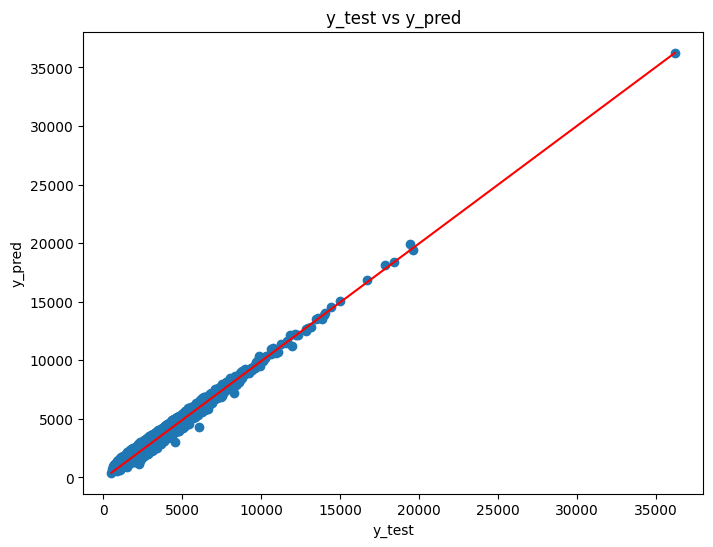

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_scaled, test_size=0.2, random_state=42)

final_model = Ridge()
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))

plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original)
plt.plot([min(y_test_original), max(y_test_original)],
 [min(y_pred_original), max(y_pred_original)], color='red')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("y_test vs y_pred")
plt.show()
